In [3]:
#imports
# also hmm, how is the python environment actually interacting with this shit. 
import pandas as pd
import numpy as np
import matplotlib as pyplot
from scipy import stats


In [60]:
#merging data 

df_2016 = pd.read_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Merged_2016_Cleaned.csv")
df_2017 = pd.read_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Merged_2017_Cleaned.csv")
df_2018 = pd.read_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Merged_2018_Cleaned.csv")
df_2015 = pd.read_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Merged_2015_Cleaned.csv")

df_aggregate = df_2016.append(df_2015, ignore_index = True)
df_aggregate = df_aggregate.append(df_2017, ignore_index = True)
df_aggregate = df_aggregate.append(df_2018, ignore_index = True)

df_aggregate

,Unnamed: 0,Country,Country Code,GINI,GDP,Happiness Score
0,41,Luxembourg,LUX,-31.7,104278.391000,6.871
1,11,Switzerland,CHE,-33.0,83073.280080,7.509
2,50,Norway,NOR,-28.5,70460.560530,7.498
3,33,Ireland,IRL,-32.8,62993.745100,6.907
4,34,Iceland,ISL,-27.2,61987.926360,7.501
...,...,...,...,...,...,...
258,56,Vietnam,VNM,-35.7,2566.447487,5.103
259,24,Honduras,HND,-48.9,2510.322943,5.504
260,36,Nigeria,NGA,-35.1,2027.778549,5.155
261,39,Pakistan,PAK,-31.6,1482.213067,5.472


In [61]:
df_aggregate.to_csv('/Users/jackheadland/Desktop/Data Analysis capstone /Aggregate_Cleaned.csv')

In [42]:
#importing Data 
# hmm, should redo so that this can be put into version control or something with references to this data
Gini_2016 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /GiniCoefficientData/Gini by country 2016.csv")
Happiness_2016 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /HappinessScoreArchive/2016.csv")
GDP_2016 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /GDPData/GDP by country - World Bank - GDP-2016.csv")

Gini_2017 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /GiniCoefficientData/Gini by country 2017.csv")
Happiness_2017 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /HappinessScoreArchive/2017.csv")
GDP_2017 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /GDPData/GDP by country - World Bank - GDP-2017.csv")

Gini_2018 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /GiniCoefficientData/Gini by country 2018.csv")
Happiness_2018 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /HappinessScoreArchive/2018.csv")
GDP_2018 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /GDPData/GDP by country - World Bank - GDP-2018.csv")

Happiness_2015 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /HappinessScoreArchive/2015.csv")
GDP_2015 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /GDPData/GDP by country - World Bank - GDP-2015.csv")
Gini_2015 = pd.read_csv("/Users/jackheadland/Desktop/Data Analysis capstone /GiniCoefficientData/Gini by country 2015.csv")


In [20]:
# OK , 2018 is DONE
Merged_2018 = pd.merge(left= Gini_2018, right = Happiness_2018, left_on='Country Name',right_on = 'Country or region')
Merged_2018 = Merged_2018.rename(columns={'Score':'Happiness Score'})
Merged_2018 = Merged_2018.rename(columns={'GDP':'DELETE'})
Merged_2018 = Merged_2018.rename(columns={'Country Name':'Country'})
Merged_2018 = pd.merge(left= Merged_2018, right = GDP_2018, left_on='Country',right_on = 'Country Name')
Merged_2018 = Merged_2018.rename(columns={'2018':'GDP'})
Merged_2018 = Merged_2018.sort_values(by= ['GDP'], ascending = False)

print(Merged_2018.head())

Merged_2018 = Merged_2018[['Country','Country Code_x','GINI','GDP','Happiness Score']]
Merged_2018 = Merged_2018.rename(columns={'Country Code_x':'Country Code'})

Merged_2018['GINI'] = Merged_2018['GINI'].multiply(-1) 

Merged_2018.head()
Merged_2018.to_csv('/Users/jackheadland/Desktop/Data Analysis capstone /Merged_2018_Cleaned.csv')

  Country Name Country Code  2015
0      Albania          ALB  32.9
1      Armenia          ARM  32.4
2      Austria          AUT  30.5
3      Belgium          BEL  27.7
4        Benin          BEN  47.8


In [19]:
# 2017 is DONE 
Merged_2017 = pd.merge(left= Gini_2017, right = Happiness_2017, left_on='Country Name',right_on = 'Country')
Merged_2017 = Merged_2017.rename(columns={'Happiness.Score':'Happiness Score'})
Merged_2017 = Merged_2017.rename(columns={'GDP':'DELETE'})
Merged_2017 = pd.merge(left= Merged_2017, right = GDP_2017, left_on='Country',right_on = 'Country Name')
Merged_2017 = Merged_2017.rename(columns={'2017':'GDP'})

Merged_2017.head()

Merged_2017 = Merged_2017.sort_values(by= ['GDP'], ascending = False)
Merged_2017['GINI'] = Merged_2017['GINI'].multiply(-1) 


Merged_2017 = Merged_2017[['Country','Country Code_x','GINI','GDP','Happiness Score']]
Merged_2017 = Merged_2017.rename(columns = {'Country Code_x': 'Country Code'})

Merged_2017

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [56]:
#2016 DONE 
Merged_2016 = pd.merge(left= Gini_2016, right = Happiness_2016, left_on='Country Name',right_on = 'Country')

Merged_2016 = pd.merge(left= Merged_2016, right = GDP_2016, left_on='Country Code',right_on = 'Country Code')
Merged_2016 = Merged_2016.rename(columns={'2016':'GDP'})

print(Merged_2016.head())

Merged_2016 = Merged_2016.sort_values(by= ['GDP'], ascending = False)



Merged_2016 = Merged_2016[['Country', 'Country Code','GINI','GDP','Happiness Score']]
Merged_2016 = Merged_2016[Merged_2016['GDP'].notna()]

Merged_2016['GINI'] = Merged_2016['GINI'].multiply(-1)

Merged_2016

  Country Name_x Country Code  GINI    Country                       Region  \
0        Albania          ALB  33.7    Albania   Central and Eastern Europe   
1      Argentina          ARG  42.0  Argentina  Latin America and Caribbean   
2        Armenia          ARM  32.5    Armenia   Central and Eastern Europe   
3        Austria          AUT  30.8    Austria               Western Europe   
4        Belgium          BEL  27.6    Belgium               Western Europe   

   Happiness Rank  Happiness Score  Lower Confidence Interval  \
0             109            4.655                      4.546   
1              26            6.650                      6.560   
2             121            4.360                      4.266   
3              12            7.119                      7.045   
4              18            6.929                      6.861   

   Upper Confidence Interval  Economy (GDP per Capita)   Family  \
0                      4.764                   0.95530  0.50163   


,Country,Country Code,GINI,GDP,Happiness Score
41,Luxembourg,LUX,-31.7,104278.391000,6.871
11,Switzerland,CHE,-33.0,83073.280080,7.509
50,Norway,NOR,-28.5,70460.560530,7.498
33,Ireland,IRL,-32.8,62993.745100,6.907
34,Iceland,ISL,-27.2,61987.926360,7.501
...,...,...,...,...,...
5,Bangladesh,BGD,-32.4,1401.564635,4.643
57,Rwanda,RWA,-43.7,744.760749,3.515
65,Uganda,UGA,-42.8,733.397132,3.739
38,Liberia,LBR,-35.3,714.623392,3.622


In [54]:
# 2015 DONE 
Merged_2015 = pd.merge(left= Gini_2015, right = Happiness_2015, left_on='Country Name',right_on = 'Country')

Merged_2015 = pd.merge(left= Merged_2015, right = GDP_2015, left_on='Country',right_on = 'Country Name')
Merged_2015 = Merged_2015.rename(columns={'2015':'GINI'})

print(Merged_2015.head())


Merged_2015['GINI'] = Merged_2015['GINI'].multiply(-1)
Merged_2015 = Merged_2015[['Country','Country Code','GINI','GDP','Happiness Score']]
Merged_2015 = Merged_2015.sort_values(by= ['GDP'], ascending = False)

Merged_2015.head()




  Country Name_x Country Code  GINI  Country                      Region  \
0        Albania          ALB  32.9  Albania  Central and Eastern Europe   
1        Armenia          ARM  32.4  Armenia  Central and Eastern Europe   
2        Austria          AUT  30.5  Austria              Western Europe   
3        Belgium          BEL  27.7  Belgium              Western Europe   
4          Benin          BEN  47.8    Benin          Sub-Saharan Africa   

   Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)  \
0              95            4.959         0.05013                   0.87867   
1             127            4.350         0.04763                   0.76821   
2              13            7.200         0.03751                   1.33723   
3              19            6.937         0.03595                   1.30782   
4             155            3.340         0.03656                   0.28665   

    Family  Health (Life Expectancy)  Freedom  Trust (Governme

,Country,Country Code,GINI,GDP,Happiness Score
40,Luxembourg,LUX,-32.9,101376.49660,6.946
11,Switzerland,CHE,-32.3,84776.14217,7.587
48,Norway,NOR,-27.5,74355.51586,7.522
34,Ireland,IRL,-31.8,62000.11881,6.940
68,United States,USA,-41.2,56863.37150,7.119


In [55]:

Merged_2015.to_csv('/Users/jackheadland/Desktop/Data Analysis capstone /Merged_2015_Cleaned.csv')

In [29]:
Merged_2018.to_csv('/Users/jackheadland/Desktop/Data Analysis capstone /Merged_2018_Cleaned.csv')

In [44]:
print(Gini_2016.head())



  Country Name Country Code  GINI
0      Albania          ALB  33.7
1    Argentina          ARG  42.0
2      Armenia          ARM  32.5
3      Austria          AUT  30.8
4      Belgium          BEL  27.6


In [45]:
print(Happiness_2016.head())

       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

In [48]:
GDP_2016.head()

,Country Name,Country Code,2016
0,Aruba,ABW,28452.170610
1,Africa Eastern and Southern,AFE,1401.281053
2,Afghanistan,AFG,509.220101
3,Africa Western and Central,AFW,1666.422406
4,Angola,AGO,3506.073128


In [50]:
Merged_2016 = pd.merge(left= Gini_2016, right = Happiness_2016, left_on='Country Name',right_on = 'Country')

Merged_2016 = pd.merge(left= Merged_2016, right = GDP_2016, left_on='Country Code',right_on = 'Country Code')
Merged_2016 = Merged_2016.rename(columns={'2016':'GDP'})

print(Merged_2016.head())

Merged_2016 = Merged_2016.sort_values(by= ['GDP'], ascending = False)



Merged_2016 = Merged_2016[['Country', 'Country Code','GINI','GDP','Happiness Score']]

Merged_2016['GINI'] = Merged_2016['GINI'].multiply(-1)

Merged_2016

  Country Name_x Country Code  GINI    Country                       Region  \
0        Albania          ALB  33.7    Albania   Central and Eastern Europe   
1      Argentina          ARG  42.0  Argentina  Latin America and Caribbean   
2        Armenia          ARM  32.5    Armenia   Central and Eastern Europe   
3        Austria          AUT  30.8    Austria               Western Europe   
4        Belgium          BEL  27.6    Belgium               Western Europe   

   Happiness Rank  Happiness Score  Lower Confidence Interval  \
0             109            4.655                      4.546   
1              26            6.650                      6.560   
2             121            4.360                      4.266   
3              12            7.119                      7.045   
4              18            6.929                      6.861   

   Upper Confidence Interval  Economy (GDP per Capita)   Family  \
0                      4.764                   0.95530  0.50163   


,Country,Country Code,GINI,GDP,Happiness Score
41,Luxembourg,LUX,-31.7,104278.391000,6.871
11,Switzerland,CHE,-33.0,83073.280080,7.509
50,Norway,NOR,-28.5,70460.560530,7.498
33,Ireland,IRL,-32.8,62993.745100,6.907
34,Iceland,ISL,-27.2,61987.926360,7.501
...,...,...,...,...,...
57,Rwanda,RWA,-43.7,744.760749,3.515
65,Uganda,UGA,-42.8,733.397132,3.739
38,Liberia,LBR,-35.3,714.623392,3.622
48,Malawi,MWI,-44.7,315.777987,4.156


In [57]:
Merged_2016.to_csv('/Users/jackheadland/Desktop/Data Analysis capstone /Merged_2016_Cleaned.csv')

<AxesSubplot:xlabel='GINI', ylabel='Happiness Score'>

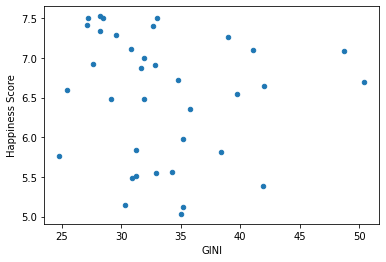

In [20]:
Merged_2016.plot.scatter(x='GINI', y = 'Happiness Score')

In [21]:
stats.pearsonr(Merged_2016['GINI'],Merged_2016['Happiness Score'])

(-0.09948071430387911, 0.5637677467652571)

<AxesSubplot:xlabel='GDP', ylabel='Happiness Score'>

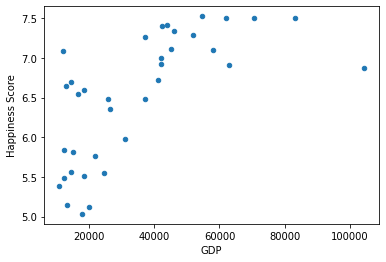

In [22]:
Merged_2016.plot.scatter(x='GDP', y = 'Happiness Score')

In [34]:
Merged_2017 = pd.merge(left= Gini_2017, right = Happiness_2017, left_on='Country Name',right_on = 'Country')
Merged_2017 = Merged_2017.rename(columns={'Happiness.Score':'Happiness Score'})
Merged_2017 = Merged_2017.rename(columns={'GDP':'DELETE'})
Merged_2017 = pd.merge(left= Merged_2017, right = GDP_2017, left_on='Country',right_on = 'Country Name')
Merged_2017 = Merged_2017.rename(columns={'2017':'GDP'})

Merged_2017.head()

Merged_2017 = Merged_2017.sort_values(by= ['GDP'], ascending = False)
Merged_2017['GINI'] = Merged_2017['GINI'].multiply(-1) 


Merged_2017 = Merged_2017[['Country','Country Code_x','GINI','GDP','Happiness Score']]
Merged_2017 = Merged_2017.rename(columns = {'Country Code_x': 'Country Code'})

Merged_2017


,Country,Country Code,GINI,GDP,Happiness Score
38,Luxembourg,LUX,-34.5,107361.306900,6.863
11,Switzerland,CHE,-32.7,83352.088650,7.494
45,Norway,NOR,-27.0,75496.754060,7.537
33,Iceland,ISL,-26.1,72010.149030,7.504
32,Ireland,IRL,-31.4,70413.121830,6.977
...,...,...,...,...,...
64,Zimbabwe,ZWE,-44.3,1335.665064,3.875
42,Myanmar,MMR,-30.7,1257.803576,4.545
36,Lesotho,LSO,-44.9,1102.944410,3.808
59,Tanzania,TZA,-40.5,1004.906588,3.349


In [35]:
Merged_2017.to_csv('/Users/jackheadland/Desktop/Data Analysis capstone /Merged_2017_Cleaned.csv')

<AxesSubplot:xlabel='GDP', ylabel='Happiness'>

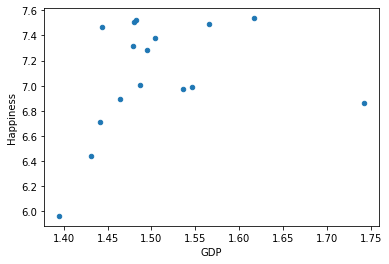

In [13]:
Merged_2017.plot.scatter(x='GDP', y = 'Happiness')

<AxesSubplot:xlabel='GINI', ylabel='Happiness'>

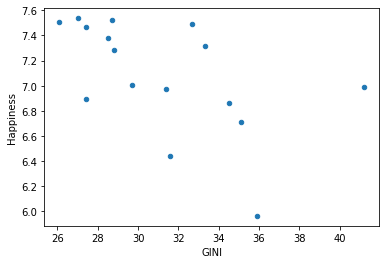

In [14]:
Merged_2017.plot.scatter(x='GINI', y = 'Happiness')

In [4]:
Merged_2018 = pd.merge(left= Gini_2018, right = Happiness_2018, left_on='Country Name',right_on = 'Country or region')
Merged_2018 = Merged_2018.rename(columns={'Score':'Happiness Score'})

Merged_2018 = pd.merge(left= Merged_2016, right = GDP_2017, left_on='Country',right_on = 'Country Name')

Merged_2018.head()

Merged_2018 = Merged_2018.sort_values(by= ['GDP'], ascending = False)

Merged_2018 = Merged_2018[Merged_2018.GDP > 1.185]

Merged_2018

NameError: name 'Gini_2018' is not defined

In [16]:
Happiness_2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


<AxesSubplot:xlabel='GDP', ylabel='Happiness'>

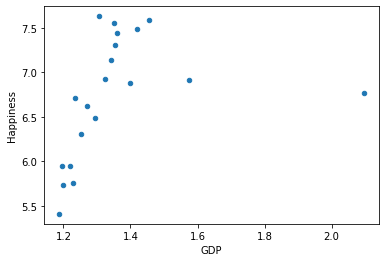

In [17]:
Merged_2018.plot.scatter(x='GDP', y = 'Happiness')

<AxesSubplot:xlabel='GINI', ylabel='Happiness'>

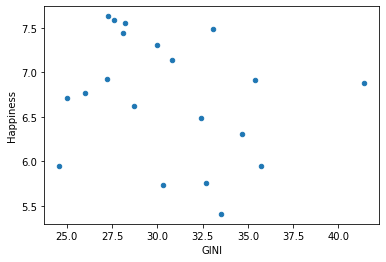

In [18]:
Merged_2018.plot.scatter(x='GINI', y = 'Happiness')

In [89]:
data = pd.read_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Appended_Normalised.csv")
data = data[['Country','GINI','GDP','Happiness Score']]
data

,Country,GINI,GDP,Happiness Score
0,Zimbabwe,44.3,-0.876196,3.875
1,Zambia,57.1,-0.822533,5.129
2,Vietnam,35.3,-0.814712,5.061
3,Vietnam,35.7,-0.800980,5.103
4,Uruguay,40.1,-0.167444,6.485
...,...,...,...,...
258,Argentina,41.3,-0.427703,6.388
259,Angola,51.3,-0.771207,3.795
260,Albania,32.9,-0.702555,4.959
261,Albania,33.7,-0.727486,4.655


In [90]:
data = data.sort_values(by= ['Country'], ascending = False)
data
data.to_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Appended_Normalised.csv")



In [93]:
data = pd.read_csv(f"/Users/jackheadland/Desktop/Data Analysis capstone /Merged_2017_Cleaned.csv")
data


,Unnamed: 0,Country,GINI,GDP,Happiness Score
0,38,Luxembourg,34.5,107361.306900,6.863
1,11,Switzerland,32.7,83352.088650,7.494
2,45,Norway,27.0,75496.754060,7.537
3,33,Iceland,26.1,72010.149030,7.504
4,32,Ireland,31.4,70413.121830,6.977
...,...,...,...,...,...
60,64,Zimbabwe,44.3,1335.665064,3.875
61,42,Myanmar,30.7,1257.803576,4.545
62,36,Lesotho,44.9,1102.944410,3.808
63,59,Tanzania,40.5,1004.906588,3.349
